In [ ]:
import pandas as pd
data = pd.read_csv('/content/emotions.csv')
data.head()
# Prepare the data
X = data.iloc[:, :-1].values # Select all columns except the last one
y = data['label'].values

from sklearn.preprocessing import LabelEncoder

# Encode labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and prepare data
data = pd.read_csv('emotions.csv')
X = data.drop(columns=['label'])
y = data['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate SVM
print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, svm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

# Evaluate Logistic Regression
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))


SVM Performance:
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       143
           1       0.99      0.97      0.98       148
           2       0.94      0.93      0.93       136

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427

Confusion Matrix:
[[140   0   3]
 [  0 143   5]
 [  8   2 126]]

Logistic Regression Performance:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       143
           1       1.00      0.99      1.00       148
           2       0.97      0.96      0.96       136

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

Confusion Matrix:
[[140   0   3]
 [  0 147   1]

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and prepare data
data = pd.read_csv('emotions.csv')
X = data.drop(columns=['label'])
y = data['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Apply Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get top 10 feature names
top_feature_indices = selector.get_support(indices=True)
top_feature_names = X.columns[top_feature_indices]

print(f"Top 10 Features: {top_feature_names.tolist()}")

# Convert selected features to DataFrames
X_train_selected_df = pd.DataFrame(X_train_selected, columns=top_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=top_feature_names)

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_selected_df, y_train)
svm_predictions = svm_model.predict(X_test_selected_df)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_selected_df, y_train)
lr_predictions = lr_model.predict(X_test_selected_df)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected_df, y_train)
rf_predictions = rf_model.predict(X_test_selected_df)

# Evaluate SVM
print("\nSVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, svm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

# Evaluate Logistic Regression
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))


Top 10 Features: ['min_2_a', 'min_q_2_a', 'min_q_7_a', 'min_q_12_a', 'min_q_17_a', 'min_2_b', 'min_q_2_b', 'min_q_7_b', 'min_q_12_b', 'min_q_17_b']

SVM Performance:
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       143
           1       0.73      0.97      0.83       148
           2       0.92      0.36      0.52       136

    accuracy                           0.79       427
   macro avg       0.82      0.78      0.75       427
weighted avg       0.82      0.79      0.75       427

Confusion Matrix:
[[143   0   0]
 [  0 144   4]
 [ 34  53  49]]

Logistic Regression Performance:
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       143
           1       0.79      0.94      0.86       148
           2       0.82      0.51      0.63       136

    accuracy                           0.81       427
   macr

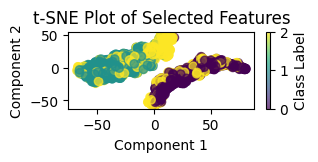


SVM Performance:
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       143
           1       0.73      0.98      0.84       148
           2       0.91      0.35      0.51       136

    accuracy                           0.78       427
   macro avg       0.81      0.77      0.74       427
weighted avg       0.81      0.78      0.75       427

Confusion Matrix:
[[141   0   2]
 [  0 145   3]
 [ 35  53  48]]

Logistic Regression Performance:
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.77      0.93      0.84       148
           2       0.77      0.48      0.59       136

    accuracy                           0.79       427
   macro avg       0.79      0.78      0.77       427
weighted avg       0.79      0.79      0.77       427

Confusion Matrix:
[[135   0   8]
 [  0 137  11

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE

# Load and prepare data
data = pd.read_csv('emotions.csv')
X = data[['min_q_7_a', 'min_q_12_b', 'min_q_12_a', 'min_2_b', 'min_q_12_b']]  # Select specified features
y = data['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for plotting
tsne_df = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
tsne_df['Label'] = y_encoded

# Plot t-SNE
plt.figure(figsize=(3, 1))
scatter = plt.scatter(tsne_df['Component 1'], tsne_df['Component 2'], c=tsne_df['Label'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Class Label')
plt.title('t-SNE Plot of Selected Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Convert to DataFrames
feature_names = X.columns
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_df, y_train)
svm_predictions = svm_model.predict(X_test_df)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_df, y_train)
lr_predictions = lr_model.predict(X_test_df)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_df, y_train)
rf_predictions = rf_model.predict(X_test_df)

# Evaluate SVM
print("\nSVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, svm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

# Evaluate Logistic Regression
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
